In [13]:
import sys
import os
import glob
from mpi4py import MPI
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'
from matplotlib.ticker import FormatStrFormatter

import scripts.statistics as stats
import scripts.get_namelist as nml
from scripts.common import *

directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/1024x1448x512/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/256x384x128/with_LAD/'
inp = nml.inputs(directory,verbose=True)
Nx,Ny,Nz,Lx,Ly,Lz = nml.read_grid_params(directory,verbose=True)
Ny = int(Ny)
y = np.linspace(-Ly/2.,Ly/2.,Ny)
x = np.linspace(0.,Lx,int(Nx))
z = np.linspace(0.,Lx,int(Nx))

flist = glob.glob(directory+"*hhdecomp*dat")
flist.sort()
print([f.split('/')[-1] for f in flist])

# And read growth rates
tlist,dlist,rates = growth_rates(directory+'shearlayer_')


Params for this run:
	Mc = 0.2
	Re = 1000.0
	rr = 1.0
Params for this grid:
	N = 1024x1448x512
	L = 150.0x200.0x75.0
['shearlayer_hhdecomp_0014.dat', 'shearlayer_hhdecomp_0015.dat', 'shearlayer_hhdecomp_0016.dat', 'shearlayer_hhdecomp_0017.dat', 'shearlayer_hhdecomp_0018.dat', 'shearlayer_hhdecomp_0019.dat', 'shearlayer_hhdecomp_0020.dat', 'shearlayer_hhdecomp_0101.dat', 'shearlayer_hhdecomp_0102.dat', 'shearlayer_hhdecomp_0103.dat', 'shearlayer_hhdecomp_0104.dat', 'shearlayer_hhdecomp_0105.dat', 'shearlayer_hhdecomp_0106.dat', 'shearlayer_hhdecomp_0107.dat', 'shearlayer_hhdecomp_0108.dat']


/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/1024x1448x512/


array([[ 9.13229360e-06, -3.67897374e-05,  1.68629686e-05],
       [ 1.41460750e-05, -3.03740762e-05,  1.30785420e-05],
       [ 1.08728436e-05, -2.96302915e-05,  1.85908175e-05],
       [ 1.46701668e-05, -2.66695370e-05,  1.84135515e-05],
       [ 1.17281070e-05, -2.05407632e-05,  1.60164873e-05],
       [ 4.36062874e-06, -2.11864353e-05,  1.59664378e-05],
       [ 5.22907476e-06, -2.14819702e-05,  1.58198745e-05],
       [ 5.75768581e-06, -2.01463554e-05,  1.43670941e-05],
       [ 5.11606640e-06, -2.03722193e-05,  1.50322312e-05],
       [ 5.85911130e-06, -2.09952577e-05,  1.55628150e-05],
       [ 5.84187592e-06, -2.08532638e-05,  1.37878906e-05],
       [ 6.06783260e-06, -2.24274518e-05,  1.40482543e-05],
       [ 6.69522115e-06, -2.24974301e-05,  1.45360600e-05],
       [ 7.42838301e-06, -2.10344624e-05,  1.28130532e-05],
       [ 7.32407580e-06, -1.97793925e-05,  1.24642238e-05]])

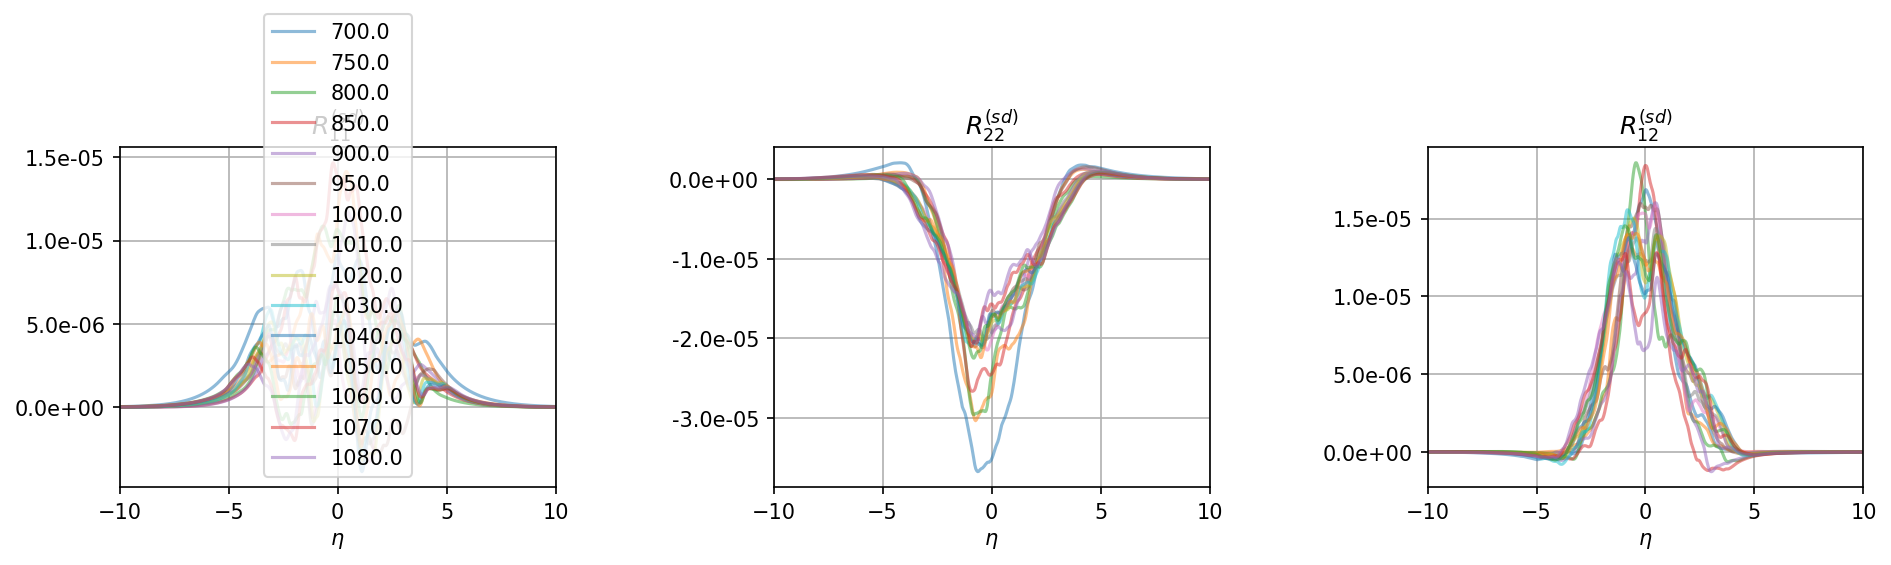

In [15]:
# Get Rij dd,sd profiles
names = ['R11','R22','R12',
        'R11_dd','R22_dd','R12_dd',
        'R11_sd','R22_sd','R12_sd',]

def get_Rij(fname):
    dat = np.fromfile(fname,dtype=float, count=-1, sep=' ')
    n = np.size(dat)
    nstats=9
    dat = np.reshape(dat,[n/nstats,nstats])
    Rij_dict = {}
    for i,name in enumerate(names):
        Rij_dict[name] = dat[:,i]
    return Rij_dict


def plot_Rij(directory,flist,savename=''):
            
    fig,ax = plt.subplots(1,3,figsize=(15,3),dpi=150)
    a = 0.5
    
    for i,fname in enumerate(flist):
        tID = fname.split('_')[-1]
        tID = int(tID.split('.dat')[0])
        time = nml.read_time(directory,tID)

        # Get dtheta
        idx = np.argmin(abs(tlist-time))
        dtheta = dlist[idx]
        yplot = y/dtheta

        d = get_Rij(fname)
        ax[0].plot(yplot,d['R11_sd'],alpha=a,label=time)
        ax[1].plot(yplot,d['R22_sd'],alpha=a,label=time)
        ax[2].plot(yplot,d['R12_sd'],alpha=a,label=time)
        plt.subplots_adjust(wspace=0.5)
        

    titles=['$R_{11}^{(sd)}$','$R_{22}^{(sd)}$','$R_{12}^{(sd)}$']
    for i,a in enumerate(ax):
        a.set_title(titles[i])
        a.set_xlim([-10,10])
        a.set_xlabel(r'$\eta$')
        a.grid(True)
        a.yaxis.set_major_formatter(FormatStrFormatter('%.1e'))
    ax[0].legend()
    
    # set the overall title and save
    # fig.suptitle('Time: {}'.format(np.around(reader.time,-1)),size=fs,y=0.95)
    if savename:
        fig.savefig(savename, dpi=200,bbox_inches='tight')
        plt.close(fig)
        print "Saved plot to ",savename
    else: 
        print(directory)
        fig.show()

plot_Rij(directory,flist[:],savename='')

In [21]:
s = '1'

if s=='1': 
    Mc_list = ['02','04','08','12','16','20']
    caselist = ['A','B','C','D','E','F']
else: Mc_list = ['02','08','20']

for case,Mc in zip(caselist,Mc_list):
    directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc%s/rr%s/1024x1448x512/'%(Mc,s)
    inp = nml.inputs(directory,verbose=False)
    Nx,Ny,Nz,Lx,Ly,Lz = nml.read_grid_params(directory,verbose=False)
    Ny = int(Ny)
    y = np.linspace(-Ly/2.,Ly/2.,Ny)

    flist = glob.glob(directory+"*hh*dat")
    flist.sort()

    # Plot Rij
    #tlist,dlist,rates = growth_rates(directory+'shearlayer_')
    #plot_Rij(directory,flist,savename=directory+'/img/Rij_sd.png')
    
    # Print values
    mat = np.zeros([len(flist),9])
    for i,fname in enumerate(flist):
        d = get_Rij(fname)
        mat[i,0] = np.amax(d['R11'])
        mat[i,1] = np.amax(d['R22'])
        mat[i,2] = np.amin(d['R12'])
        mat[i,3] = np.amax(d['R11_dd'])
        mat[i,4] = np.amax(d['R22_dd'])
        mat[i,5] = np.amin(d['R12_dd'])
        mat[i,6] = np.amax(d['R11_sd'])
        mat[i,7] = np.amin(d['R22_sd'])
        mat[i,8] = np.amax(d['R12_sd'])
    idx = -4
    R11 = np.mean(mat[idx:,0])
    R22 = np.mean(mat[idx:,1])
    R12 = np.mean(mat[idx:,2])
    R11_dd = np.mean(mat[idx:,3])
    R22_dd = np.mean(mat[idx:,4])
    R12_dd = np.mean(mat[idx:,5])
    R11_sd = np.mean(mat[idx:,6])
    R22_sd = np.mean(mat[idx:,7])
    R12_sd = np.mean(mat[idx:,8])
    scale = 1e4
    print(" %s1 & %0.3f & %0.3f & %0.3f & %0.3f & %0.3f & %0.3f & %0.3f & %0.3f & %0.3f \\\\"
                %(case,R11.max(),R11_dd.max()*scale,R11_sd.max()*scale,
                R22.max(),R22_dd.max()*scale,R22_sd.min()*scale,
                R12.min(),R12_dd.min()*scale,R12_sd.max()*scale))
    
print('Done')

 A1 & 0.031 & 0.001 & 0.084 & 0.016 & 0.001 & -0.187 & -0.010 & -0.000 & 0.099 \\
 B1 & 0.026 & 0.006 & 0.252 & 0.013 & 0.006 & -0.546 & -0.009 & -0.001 & 0.422 \\
 C1 & 0.023 & 0.113 & 1.363 & 0.009 & 0.084 & -1.165 & -0.007 & -0.020 & 0.433 \\
 D1 & 0.024 & 0.730 & 2.229 & 0.009 & 1.238 & -2.321 & -0.007 & -0.845 & 1.363 \\
 E1 & 0.020 & 0.820 & 1.743 & 0.007 & 0.778 & -2.688 & -0.005 & -0.439 & 1.456 \\
 F1 & 0.021 & 0.775 & 1.919 & 0.006 & 0.822 & -1.827 & -0.005 & -0.466 & 1.652 \\
Done


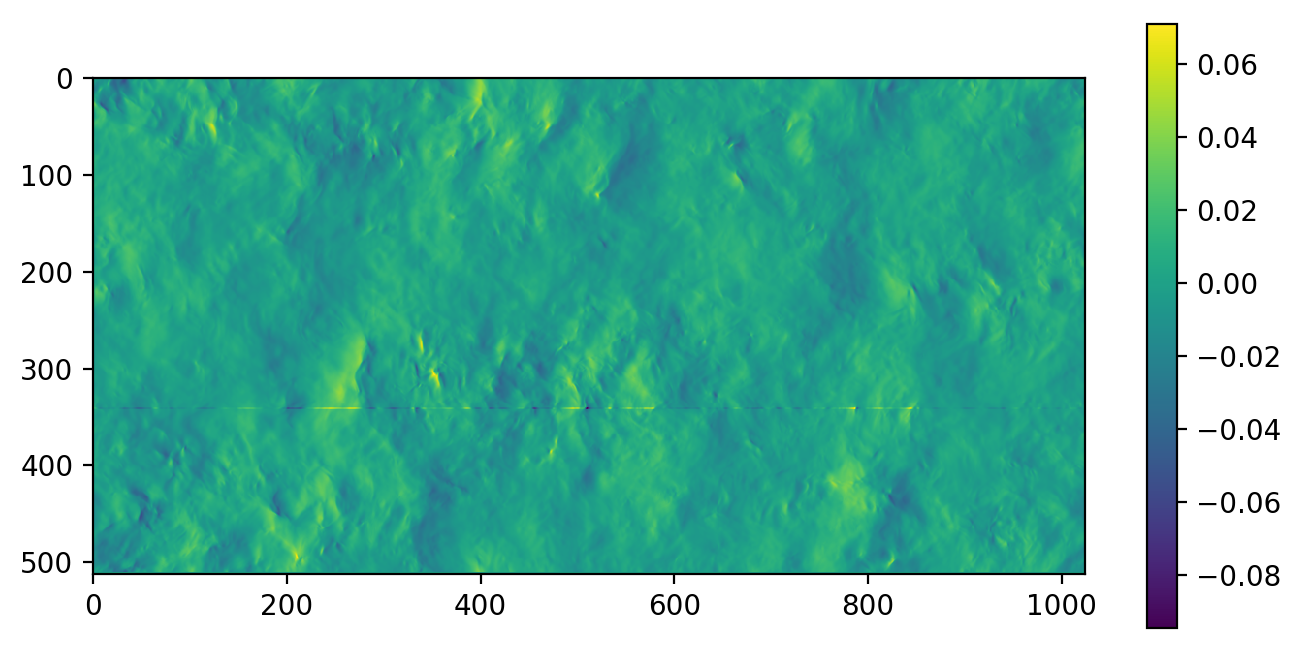

In [4]:
# plot centerline 

plane = np.load(directory+'/shearlayer_xz.npy')

fig = plt.figure(figsize=(8,4),dpi=200)
plt.imshow(plane.transpose())
plt.quiver(x,z, U, V, [C], **kw)
plt.colorbar()